# Imports

In [ ]:
import math
import io
import os

import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import cluster
from scipy.cluster import hierarchy

from sklearn import neighbors as nn
from sklearn import datasets
from sklearn.model_selection import train_test_split  # <-- This makes the training/testing split easier

from scipy.spatial import Voronoi, voronoi_plot_2d

# Data

In [ ]:
# Fisher's Iris data set
iris = datasets.load_iris()

X = iris.data[:, :2]   # first two columns (sepal length, sepal width)
y = iris.target

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
pathname = "/content/drive/My Drive/STAT 223"
os.chdir(pathname)

In [ ]:
usarrests = pd.read_csv("/content/drive/My Drive/STAT 223/USArrests.csv")

# Best K

Text(0.5, 1.0, 'Flower')

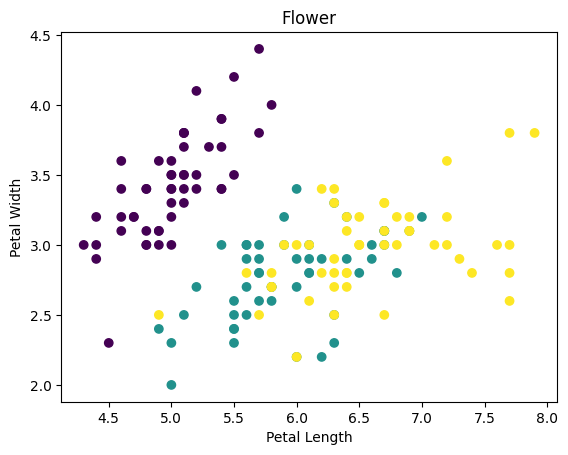

In [ ]:
plt.scatter( X[:,0],X[:,1], c=y );
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Flower")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [ ]:
# define and fit the model
knnMod = nn.KNeighborsClassifier(n_neighbors=21, weights='uniform')
knnMod.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=21)

In [ ]:
exp = knnMod.predict(X_train)
obs = y_train

print("Training Accuracy")
print("Out of",len(exp),"trials, this model was accurate for",sum(exp==obs),"observations in the training set. This is a rate of",sum(exp==obs)/len(exp))


Training Accuracy
Out of 100 trials, this model was accurate for 81 observations in the training set. This is a rate of 0.81


In [ ]:
exp = knnMod.predict(X_test)
obs = y_test

print("Testing Accuracy")
print("Out of",len(exp),"trials, this model was accurate for",sum(exp==obs),"observations in the test set. This is a rate of",sum(exp==obs)/len(exp))

Testing Accuracy
Out of 50 trials, this model was accurate for 40 observations in the test set. This is a rate of 0.8


In [ ]:
accTR = []
accTE = []
kValues = np.arange(1,50)

for k in kValues:
    knnMod = nn.KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knnMod.fit(X_train, y_train)

    exp = knnMod.predict(X_train)
    obs = y_train
    accTR.append(sum(exp==obs)/len(exp))

    exp = knnMod.predict(X_test)
    obs = y_test
    accTE.append(sum(exp==obs)/len(exp))

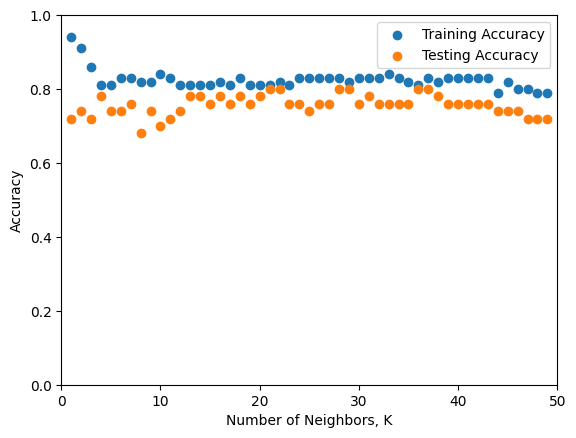

In [ ]:
plt.xlim(0,50)
plt.ylim(0,1)

plt.xlabel("Number of Neighbors, K")
plt.ylabel("Accuracy")

plt.scatter(kValues,accTR, label="Training Accuracy")
plt.scatter(kValues,accTE, label="Testing Accuracy")

plt.legend();

In [ ]:
results = pd.DataFrame({
        'k': kValues,
        'train accuracy': accTR,
        'test accuracy': accTE
    })

In [ ]:
top_k = results.sort_values(by='test accuracy', ascending=False)
top_k # best is 21

,k,train accuracy,test accuracy
20,21,0.81,0.80
28,29,0.82,0.80
27,28,0.83,0.80
36,37,0.83,0.80
35,36,0.81,0.80
21,22,0.82,0.80
15,16,0.82,0.78
13,14,0.81,0.78
17,18,0.83,0.78
30,31,0.83,0.78


# kNN model

In [ ]:
poi = [[6.0,1.8]]

knnMod = nn.KNeighborsClassifier(n_neighbors=21, weights='uniform', p=2)  # <-- p=2 means Euclidean distance
knnMod.fit(X, y)

KNeighborsClassifier(n_neighbors=21)

In [ ]:
theNeighbors = knnMod.kneighbors(poi)

Text(0.5, 1.0, 'New Flower Prediction')

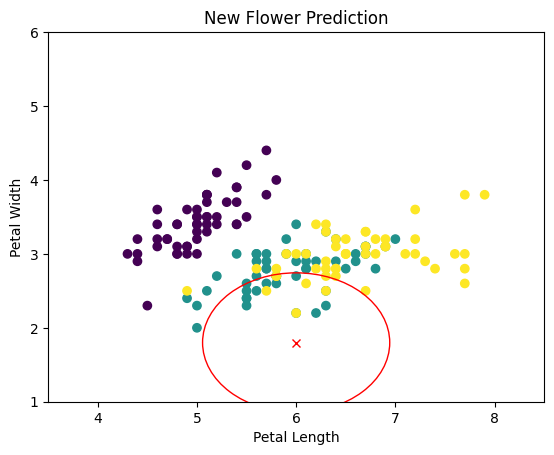

In [ ]:
neighborhood = plt.Circle((poi[0][0],poi[0][1]), np.max(theNeighbors[0]), color='r', fill=False)

plt.xlim(3.5,8.5)
plt.ylim(1,6)

plt.scatter(X[:,0], X[:,1], c=y);

plt.plot(poi[0][0], poi[0][1], 'rx')

plt.gca().add_patch(neighborhood);

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("New Flower Prediction")

# K-means

In [ ]:
# Use petal length and petal width (last two columns)
X = iris.data[:, 2:4]
y = iris.target
target_names = iris.target_names

In [ ]:
data = pd.DataFrame(X, columns=["Petal_Length", "Petal_Width"])

In [ ]:
k_means = cluster.KMeans(n_clusters=3, max_iter=100, random_state=1)
k_means.fit(data)

KMeans(max_iter=100, n_clusters=3, random_state=1)

In [ ]:
data["Cluster"] = k_means.labels_

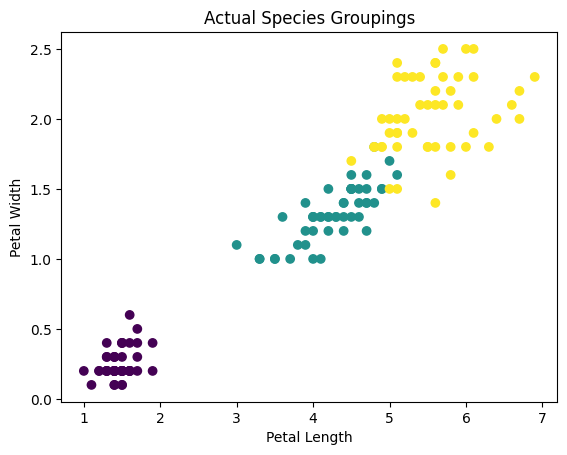

In [ ]:
#actual species
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Actual Species Groupings")
plt.show()

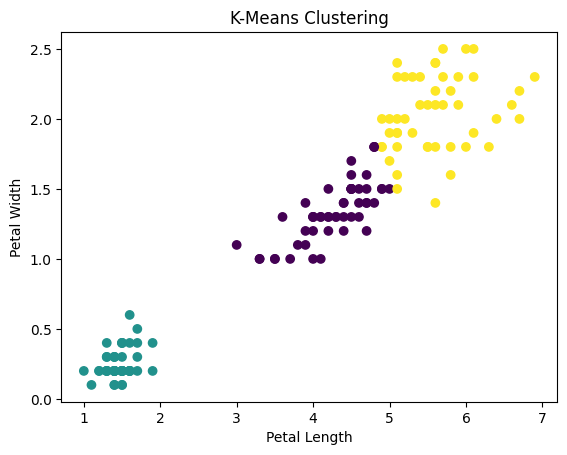

In [ ]:
# K-Means clustering results
plt.scatter(data["Petal_Length"], data["Petal_Width"], c=data["Cluster"])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("K-Means Clustering")
plt.show()

# Hierarchical Clustering

In [ ]:
usarrests.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
state_names = data.index.tolist()
X = data.values  # feature matrix

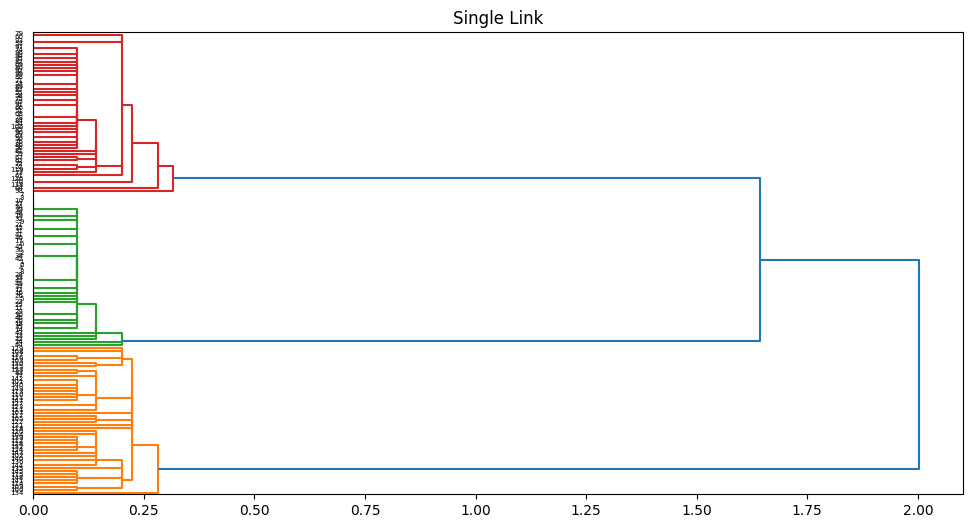

In [ ]:
# single link (min)
Z_single = hierarchy.linkage(X, method='single')
plt.figure(figsize=(12, 6))
hierarchy.dendrogram(Z_single, labels=state_names, orientation='right')
plt.title("Single Link")
plt.show()

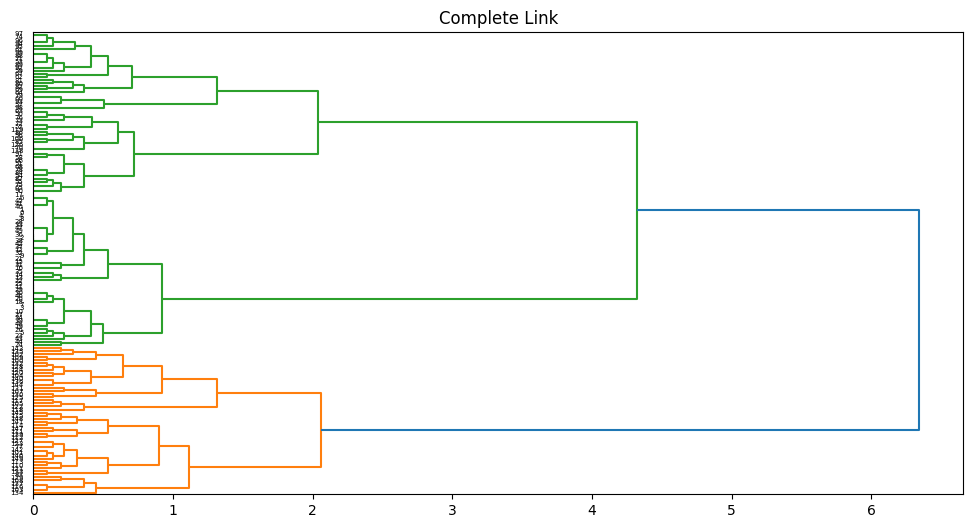

In [ ]:
# complete link (max)
Z_complete = hierarchy.linkage(X, method='complete')
plt.figure(figsize=(12, 6))
hierarchy.dendrogram(Z_complete, labels=state_names, orientation='right')
plt.title("Complete Link")
plt.show()

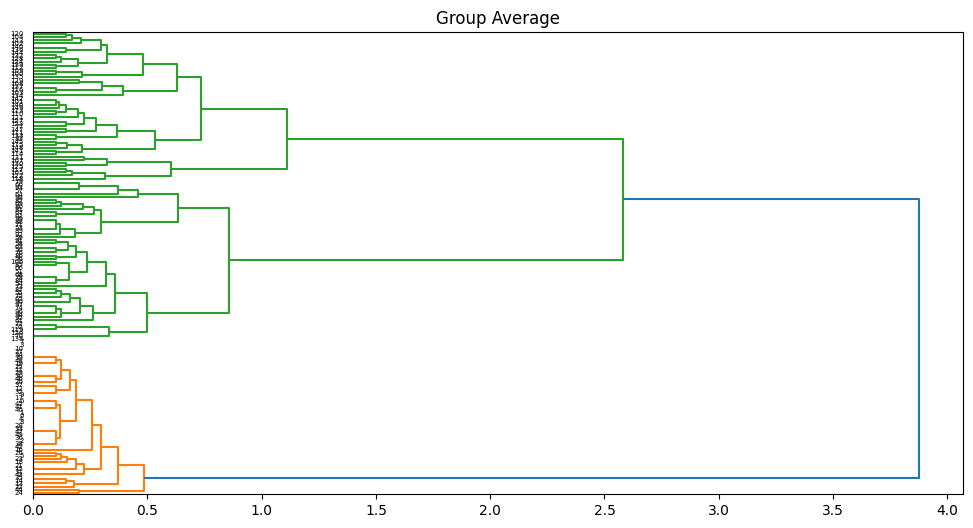

In [ ]:
# group average
Z_average = hierarchy.linkage(X, method='average')
plt.figure(figsize=(12, 6))
hierarchy.dendrogram(Z_average, labels=state_names, orientation='right')
plt.title("Group Average")
plt.show()